In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_train = pd.read_csv('../data/train.csv')

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. 무엇을 해야할까?

아래의 값을 엑셀 스프레드시트에 저장하자.

* Variable: 변수명
* Type: 변수의 타입값, 컬럼의 값들이 수치를 나타내는 'numerical'타입과, 범주형 변수를 나타내는 'categorial' 값 두개만 들어갈 수 있음
* Segment: 변수의 구분값. building, space, location값이 들어갈 수 있음
* Expectation: SalePrice에 영향을 미치는 변수들 예측, 상/중/하로 구분
* Conclusion : 데이터 탐색 후 예측한 데이터의 중요도. 상/중/하로 구분
* Comments: 일반적인 주석

스프레드시트를 채우기 전에 변수에 대한 설명을 다 읽어보고, 이런 질문들을 해본다면 어떨까.

* 이 변수는 내가 실제 집을 살 때 고려하는 부분인가?
* 그렇다면 얼마나 중요하게 고려하는가?
* 이와 연관된 컬럼은 무엇인가? (강한 결합요소 찾기)

# SalePrice 분석

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

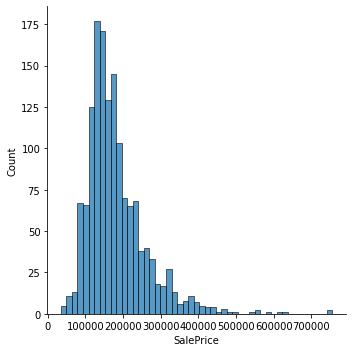

In [9]:
sns.displot(df_train['SalePrice'])

In [10]:
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## 수치형데이터와의 관계를 알아보자

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

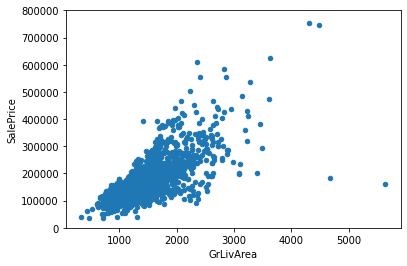

In [11]:
# Above grade (ground) living area square feet
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

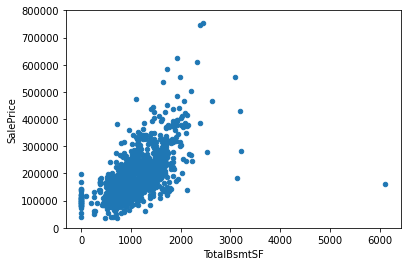

In [12]:
#Total square feet of basement area
var = 'TotalBsmtSF' 
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## 범주형 변수와의 관계를 알아보자

(-0.5, 9.5, 0.0, 800000.0)

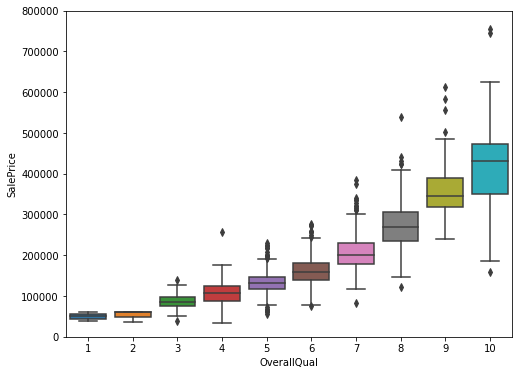

In [13]:
#Rates the overall material and finish of the house
var = 'OverallQual'
data=pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

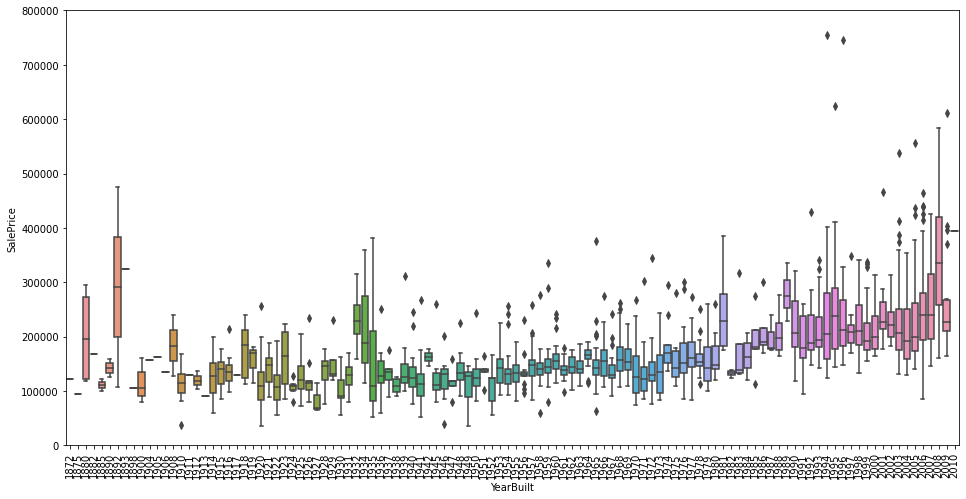

In [14]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

4개의 변수들에 대한 상관관계를 알아보았다. 모두 양의 상관관계를 나타내고 있으며, OverallQual같은 경우, 강한 양의 상관관계를 나타냈다.

## Work smart

위 방식들은 우리의 직감을 통해 연관있는 피쳐들을 뽑아내는 과정이었지만, 우리가 알아내야하는 정보는 이에 그치지 않는다

전체를 탐험하기 위해 아래 과정을 거쳐야한다
* 히트맵 스타일의 상관관계 행렬
* Zoon heatmap 스타일의 'SalePrice' 상관관계 행렬
* 연관된 변수들 사이의 산점도 그래프

<AxesSubplot:>

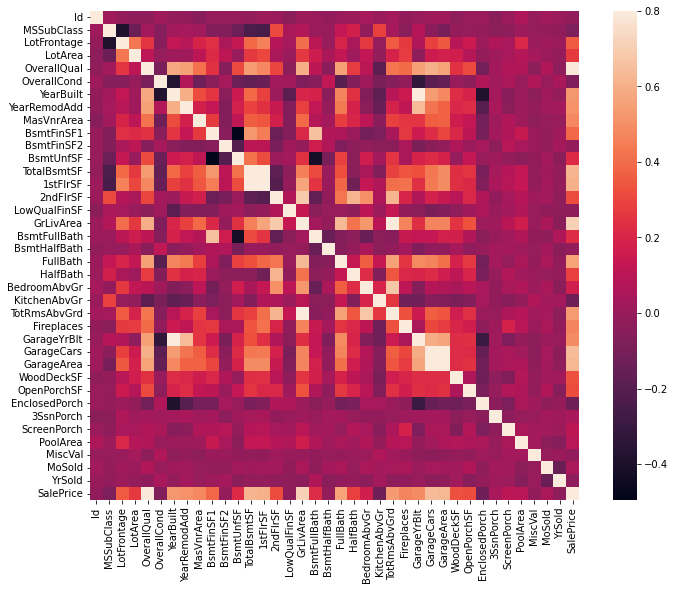

In [15]:
corrmat = df_train.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

SalePrice와 연관된 변수와의 산점도행렬

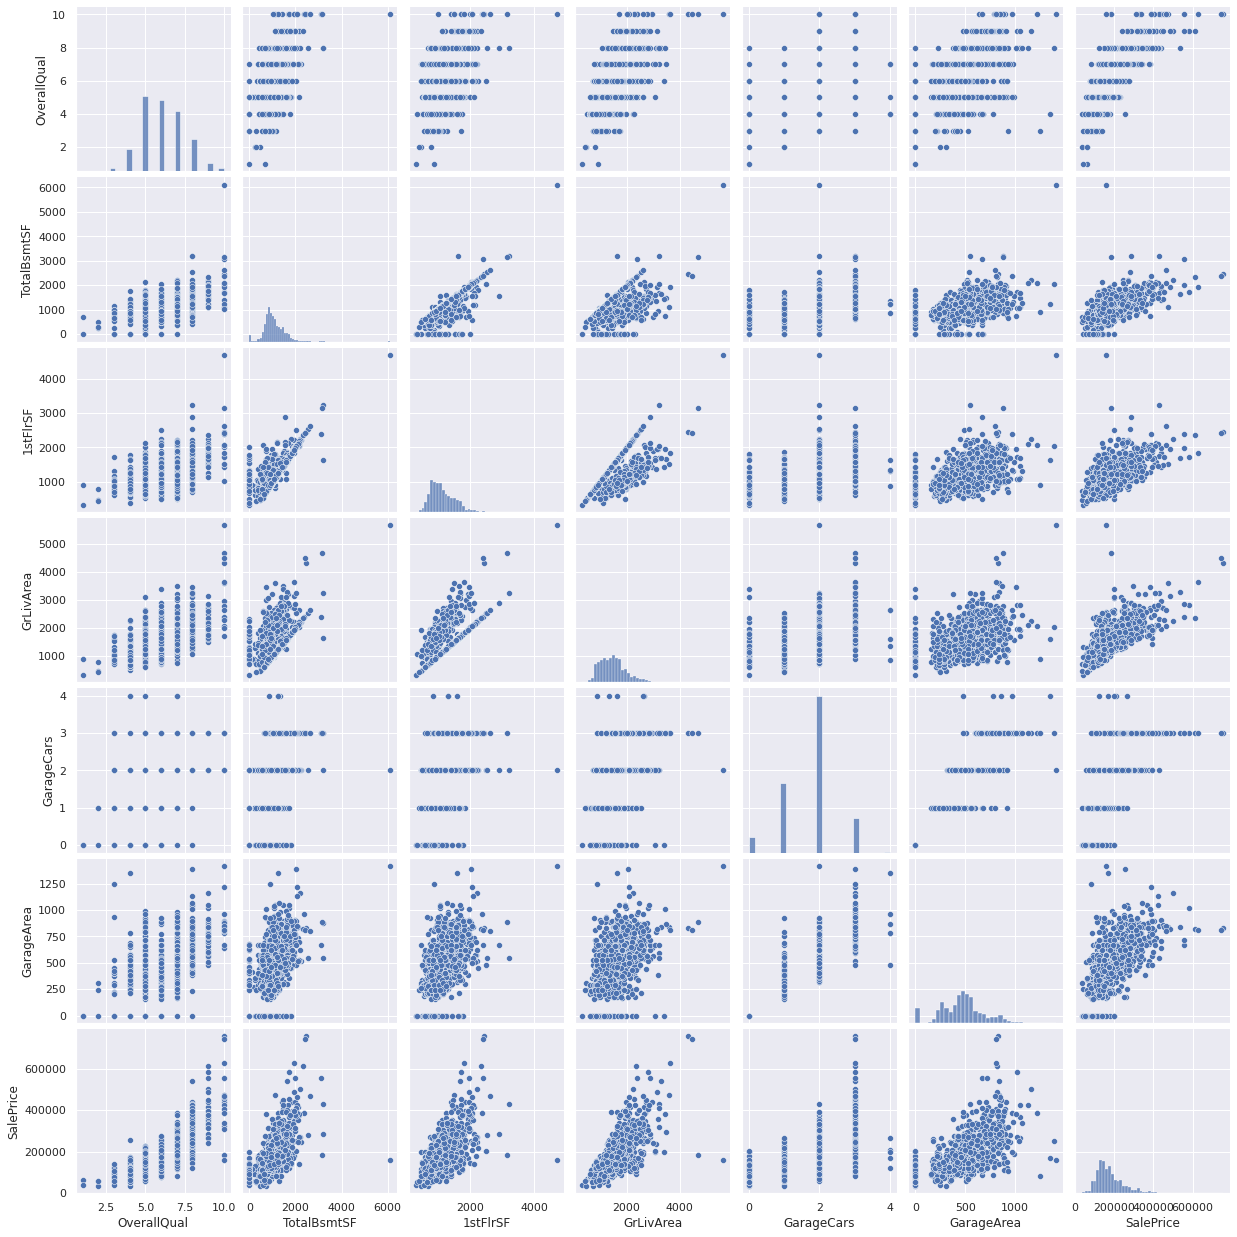

In [16]:
sns.set()
corr = df_train.corr()
mycols = [col for col in corr if abs(corr['SalePrice'][col]) > 0.6]
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt']

sns.pairplot(df_train[mycols],size=2.5)
plt.show()

## 4. 결측치

* 얼마나 많은 결측치가 있는지?
* 결측데이터에 관계가 있는지? 무작위성인지

결측치는, 표본크기가 줄어든다는 의미이기 때문에, 위 질문에 대한 대답은 중요한 의미를 갖는다. 
또한 15% 이상의 결측률을 보이는 변수는 이를 채우기 위한 어떤 방법도 사용하지 않고 지운다. (집을 구매하는데 큰 영향을 미치는 변수가 아닌 경우가 대부분이므로)

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [18]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## 이상치

### 일변량 분석
이상치의 임계점을 찾는게 가장 근본적인 문제이다. 이를 위해 데이터를 표준화한다. 여기서 표준화란, 평균을 0, 표준편차를 1로 만드는 작업이다

In [19]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution: ')
print(low_range)
print('\nouter range (high) of the distribution')
print(high_range)

outer range (low) of the distribution: 
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## 이변량분석 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

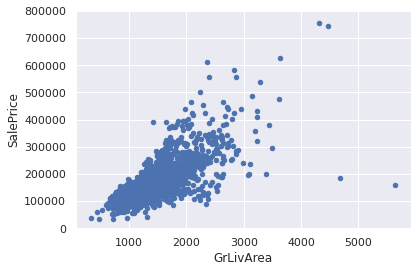

In [20]:
var = 'GrLivArea'
data =pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [21]:
df_train.sort_values(by = 'GrLivArea', ascending=False)[:2] # result: [1298, 523]
df_train.drop(df_train[df_train['Id']==1299].index)
df_train.drop(df_train[df_train['Id']==524].index)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

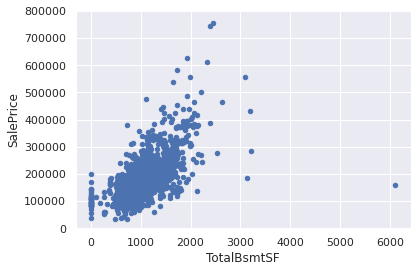

In [22]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## 더 세부적인 내용들.

SalePrice가 어떤 값인지 이해하기 위해선다변량 분석에 대한 통계적인 기초 아래의 추정이 필요하다.이미 SalePrice에 관한 몇몇 데이터를 정리하고 탐색해보았으니, 다변량 분석을 가능하게하는 통계적 추정이 어떻게 SalePrice를 경정하는지 알아보아야 한다.

4개의 통계적 추정값을 살표보자. 

* Normality - 정규성
  정규분포를 따르는지에 대한 특성. 하나의 변수에서 Saleprice가 정규한지를 체크할 것이다.
  하나의 변수에서의 정규성이 다변수에서의 정규성을 띄도록 도와주지만, 다변수에서의 정규성을 보장하지는 않는다는것을 기억하자.  
  
  하나 더 고려해야할 것은, 보통 200개 이상의 큰 샘플에 대해서는 정규성이 그다지 큰 이슈가 아니지만 정규성 문제를 해결하면 heteroscedacity를 포함한 많은 문제를 우회할 수 있다. 


* Homoscedasticity - 등분산성
  등분산성은 '종속 변수가 예측 변수 범위에 걸쳐 동일한 수준의 분산을 나타낸다는 가정'을 나타낸다.
  등분산성은 독립 변수의 모든 값에서 오차 항이 동일하기를 원하기 때문에 바람직하다. 
  
  
  
* Linearlity - 선형성
  선형성을 평가하는 가장 쉬운 방법은 산점도가 선형성을 나타내는지 체크하는것이다. 만약 선형적이지 않은 패턴이라면 데이터를 변환하는게 바람직하다. 



* Absence of correlated errors - 상관오류의 부재 
  상관오류라는 정의가 보여주듯, 하나의 오류가 다른 부분에 상관될 때 발생한다. 예를들어 긍정 오류가 대칭적으로 부정 오류를 만든다면, 이 변수들 사이에는 상관관계가 있는 것이며 이는 시계열 데이터가 시간과 관련있는 패턴일때 종종 발생한다. 

## 정규성 찾기
SalePrice 에 대한 정규성을 깔끔한 방법으로 찾아보자

* 히스토그램을 통해 첨도와 왜도 구하기
* 정규확률분포: 데이터 분포가 정규 분포를 의미하는 대각선에 근사하는지 찾기.

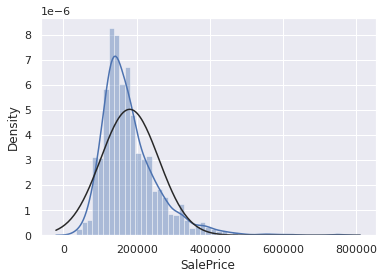

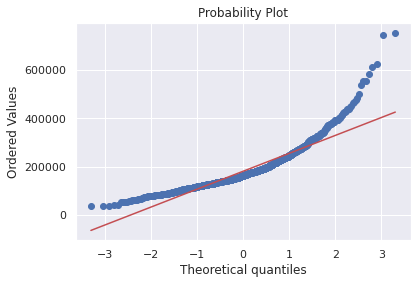

In [23]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

SalePrice는 정규성을 따르지 않는다. 그래프가 너무 뾰족하고 확률분포가 대각선을 따르지 않는다.  

그러나 간단한 데이터 변환으로 문제를 해결할 수 있다. 통계학 책에서 배울 수 있는 신기한 방법은 **로그**를 취해서 양의 왜도를 조정할 수 있다.

In [24]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

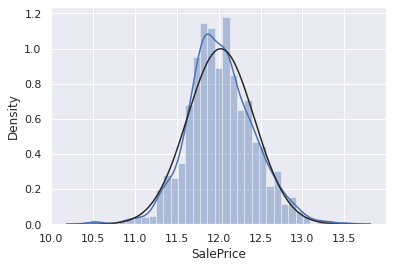

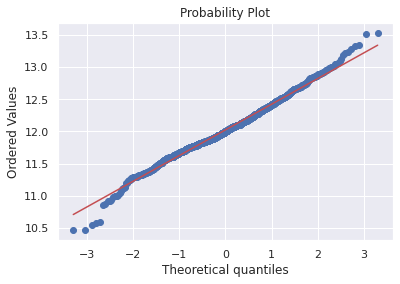

In [25]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [26]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

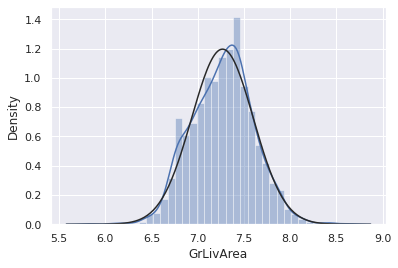

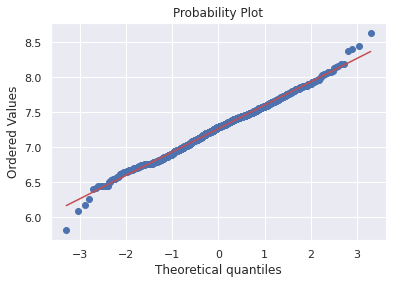

In [27]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

다음으로 아래 변수에 대한 정규화를 해보자

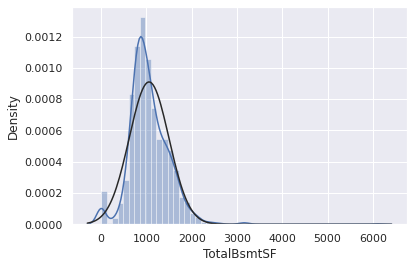

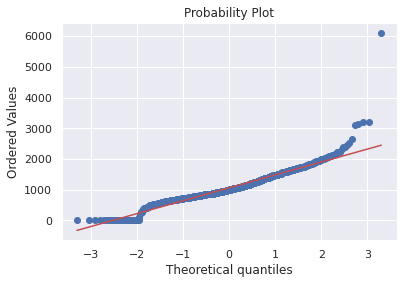

In [28]:
sns.distplot(df_train['TotalBsmtSF'],fit=norm);
fig = plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'], plot=plt)

위 그래프에서 얻을 수 있는 것들?
* 왜도
* 값이 0인 많은 수의 관측치
* 0값은 로그변환으로 근사시킬 수 없다는점

로그 변환을 적용시키기 위해  basement(?)를 가지는지 아닌지를 나타내는 변수를 하나 만들어, 0이 아닌관측치에 대한 로그 변환을 할 것이다.

In [29]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] =0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [30]:
df_train.loc[df_train['HasBsmt'] ==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

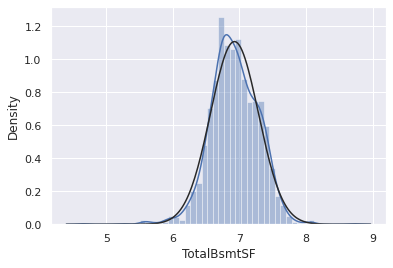

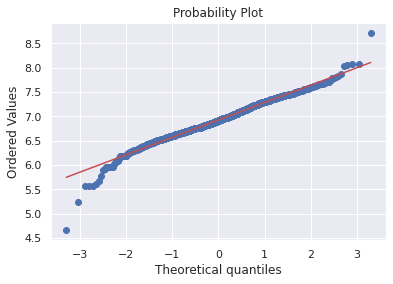

In [31]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0 ]['TotalBsmtSF'], fit=norm);
fig=plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] >0]['TotalBsmtSF'], plot=plt)

## 한번의 시도로 공분산성 찾기

그래프를 통해 두 변수의 공분산성을 검증하는 방법은 그래프이다. 콘 또는 다이아몬드 형태의 모양은 두 변수가 등분산성을 나타내는 시작입니다.



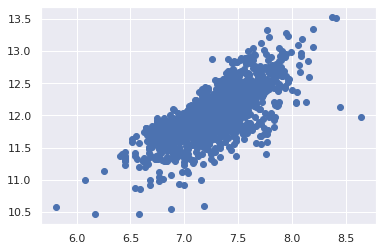

In [32]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

이전버전의 GrLivArea는 원뿔모양이지만 더이상 그렇지 않다.
(원뿔모양 산점도가 동질성을 떨어뜨린다는 말이었을까? 헷갈린다)

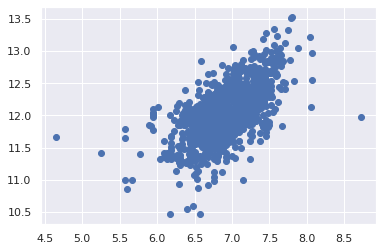

In [33]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

## 마지막으로 중요한 dummy variables


In [34]:
df_train = pd.get_dummies(df_train)

In [35]:
df_train.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0
